<a href="https://colab.research.google.com/github/nastyamatychenko/DAAD-DL_LAB-3_Anastasiia_Matychenko/blob/main/Lab_3_Anastasiia_Matychenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab_3 Anastasiia Matychenko DeepLearning

## Завантаження бібліотеки

In [11]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_datasets as tfds

## Завантажуємо стандартний датасет

In [12]:
dataset_name = "imdb_reviews"
(train_dataset, test_dataset), dataset_info = tfds.load(
    name=dataset_name,
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

## Реалізація рекурентної нейронної мережі

In [13]:
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(1, activation='sigmoid')
])

## Використовування підходу Transfer Learning в NLP задачах за допомогою пропонованих 


In [14]:
train_dataset = train_dataset.shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

## Реалізація задачі sentiment analysis (класифікація тексту)

In [15]:
embedding_model_url = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding_model_url, output_shape=[20], input_shape=[], dtype=tf.string, trainable=True)

 ## Реалізація задачі sentiment analysis (класифікація тексту)

In [16]:
model = keras.Sequential([
    hub_layer,
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

## Навчання моделі

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
391/391 [==============================] - 12s 28ms/step - loss: 0.3673 - accuracy: 0.8414 - val_loss: 0.3450 - val_accuracy: 0.8520
Epoch 2/20
391/391 [==============================] - 10s 24ms/step - loss: 0.2791 - accuracy: 0.8873 - val_loss: 0.3246 - val_accuracy: 0.8610
Epoch 3/20
391/391 [==============================] - 10s 24ms/step - loss: 0.2301 - accuracy: 0.9102 - val_loss: 0.2957 - val_accuracy: 0.8753
Epoch 4/20
391/391 [==============================] - 9s 22ms/step - loss: 0.1960 - accuracy: 0.9268 - val_loss: 0.2943 - val_accuracy: 0.8766
Epoch 5/20
391/391 [==============================] - 9s 21ms/step - loss: 0.1688 - accuracy: 0.9389 - val_loss: 0.3027 - val_accuracy: 0.8740
Epoch 6/20
391/391 [==============================] - 12s 30ms/step - loss: 0.1473 - accuracy: 0.9484 - val_loss: 0.3194 - val_accuracy: 0.8717
Epoch 7/20
391/391 [==============================] - 12s 31ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.3379 - val_accuracy: 0

## Запис історії тренування

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

## Вывод графика оценки модели

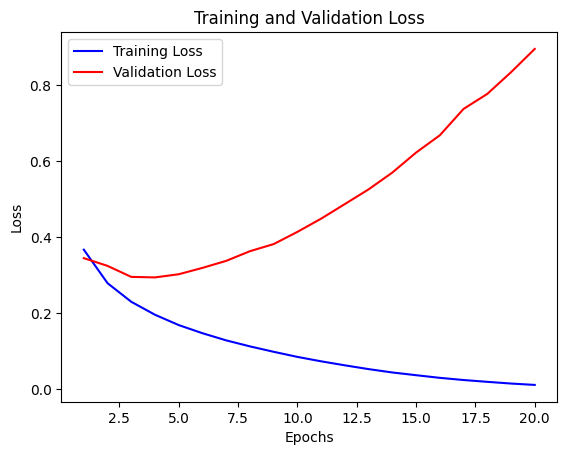

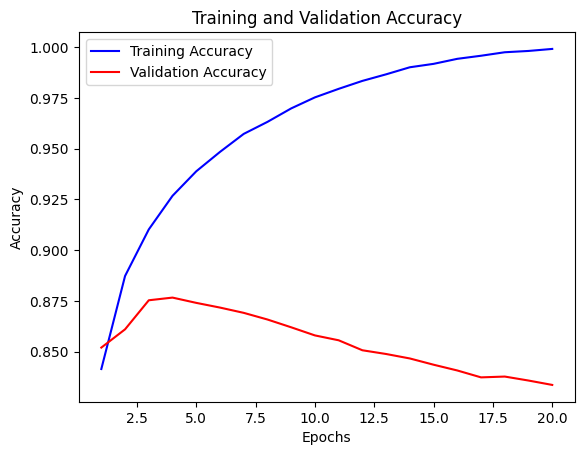

In [20]:
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Перевірка моделі на тестових даних

In [21]:
loss, accuracy = model.evaluate(test_dataset)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

391/391 [==============================] - 3s 7ms/step - loss: 0.8960 - accuracy: 0.8336
Test Loss: 0.895980954170227
Test Accuracy: 0.8335999846458435
